# **Task 6. Combining Feature Extraction Methods**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread("eminem.jpg", 0)
image2 = cv2.imread("eminem2.jpg", 0)

height1, width1 = image1.shape[:2]
height2, width2 = image2.shape[:2]

if height1 != height2 or width1 != width2:
    image2 = cv2.resize(image2, (width1, height1))

In [ ]:
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

bf_sift = cv2.BFMatcher(cv2.NORM_L2)
matches_sift = bf_sift.knnMatch(descriptors1_sift, descriptors2_sift, k=2)

bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)

good_matches_sift = []
for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_matches_sift.append(m)

# Sort ORB matches based on distance
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Visualize SIFT matches
image_matches_sift = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, good_matches_sift[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Visualize ORB matches
image_matches_orb = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_orb[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

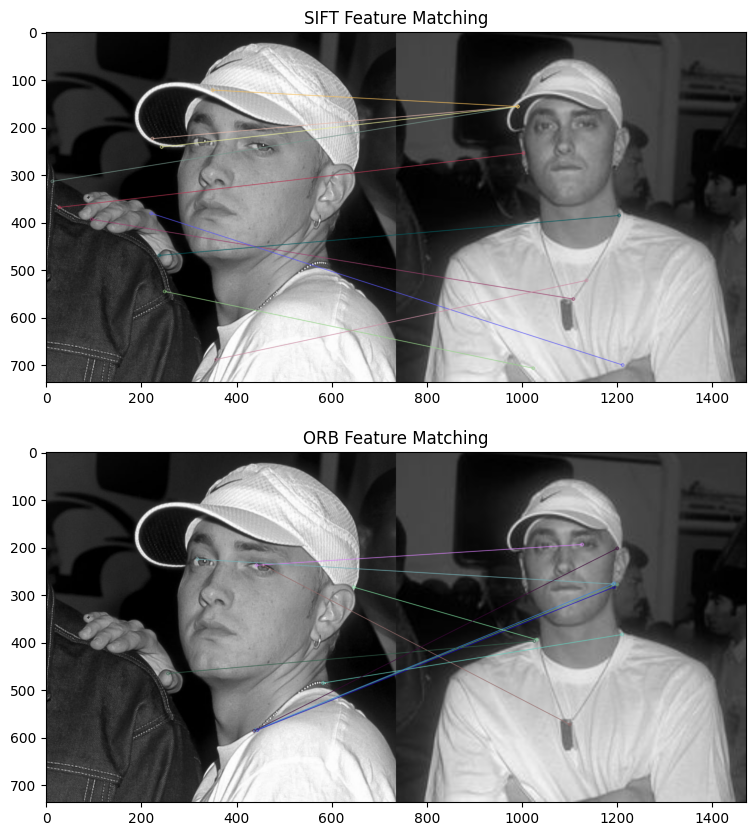

In [ ]:
# Plot SIFT and ORB matches side by side
plt.figure(figsize=(15, 10))

# SIFT matches
plt.subplot(2, 1, 1)
plt.imshow(image_matches_sift)
plt.title("SIFT Feature Matching")

# ORB matches
plt.subplot(2, 1, 2)
plt.imshow(image_matches_orb)
plt.title("ORB Feature Matching")
plt.show()